<a href="https://colab.research.google.com/github/AyushChauhan-ui/CropCounsel/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:/Users/sunny/OneDrive/Desktop/crops1.csv")

In [6]:
df.head()

,N,P,K,temperature(in degree celsius),humidity(in percentage),ph of soil,rainfall( in mm ),label,water-availability(liters per year)
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3000.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3020.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3040.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3060.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3080.0


In [7]:
df.describe()

,N,P,K,temperature(in degree celsius),humidity(in percentage),ph of soil,rainfall( in mm ),water-availability(liters per year)
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000
mean,63.829806,60.604683,55.864475,25.639519,71.163856,6.488970,164.170015,5847.690737
std,80.931997,45.239587,60.152045,5.352845,22.182367,0.864728,209.081882,22412.871398
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000310
25%,21.000000,27.000000,20.000000,22.301574,59.270550,5.934136,64.776515,0.002327
50%,37.000000,55.000000,31.000000,25.669011,80.046782,6.419052,95.713885,1.068850
75%,84.000000,73.000000,52.000000,28.918620,89.895933,6.960358,133.191442,47.900000
max,496.000000,250.000000,250.000000,43.675493,99.981876,9.935091,898.721657,114462.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   N                                    2221 non-null   int64  
 1   P                                    2221 non-null   int64  
 2   K                                    2221 non-null   int64  
 3   temperature(in degree celsius)       2221 non-null   float64
 4   humidity(in percentage)              2221 non-null   float64
 5   ph of soil                           2221 non-null   float64
 6   rainfall( in mm )                    2221 non-null   float64
 7   label                                2221 non-null   object 
 8   water-availability(liters per year)  2221 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 156.3+ KB


In [9]:
df.shape

(2221, 9)

In [10]:
df.isna().sum()

N                                      0
P                                      0
K                                      0
temperature(in degree celsius)         0
humidity(in percentage)                0
ph of soil                             0
rainfall( in mm )                      0
label                                  0
water-availability(liters per year)    0
dtype: int64

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature(in degree celsius)',
       'humidity(in percentage)', 'ph of soil', 'rainfall( in mm )', 'label',
       'water-availability(liters per year)'],
      dtype='object')

In [12]:
df.columns = ['N','P','K','Temperature','Humidity','pH','Rainfall', 'Label', 'Water Availability']

In [13]:
df.head()

,N,P,K,Temperature,Humidity,pH,Rainfall,Label,Water Availability
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3000.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3020.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3040.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3060.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3080.0


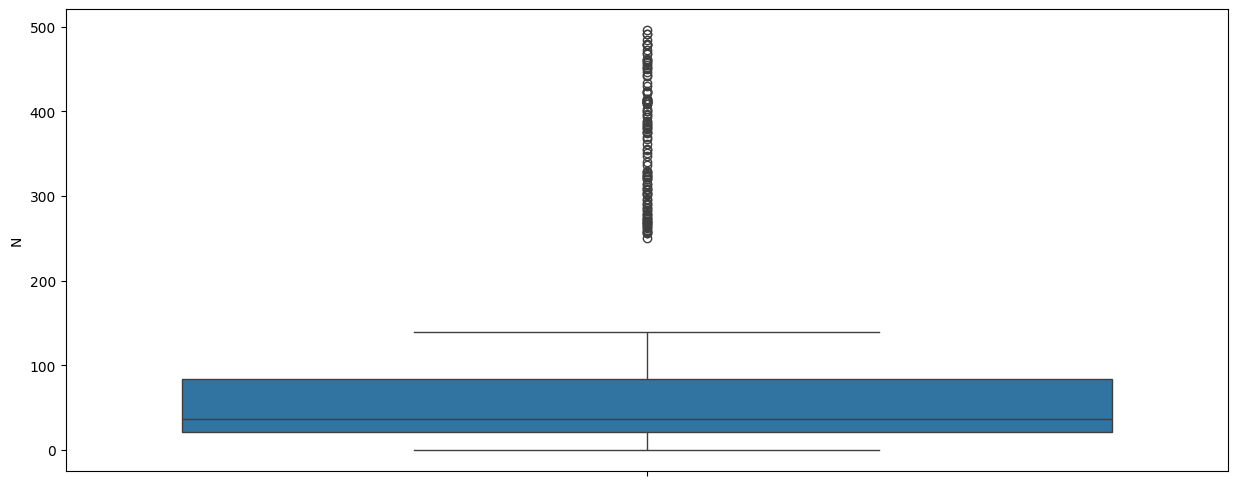

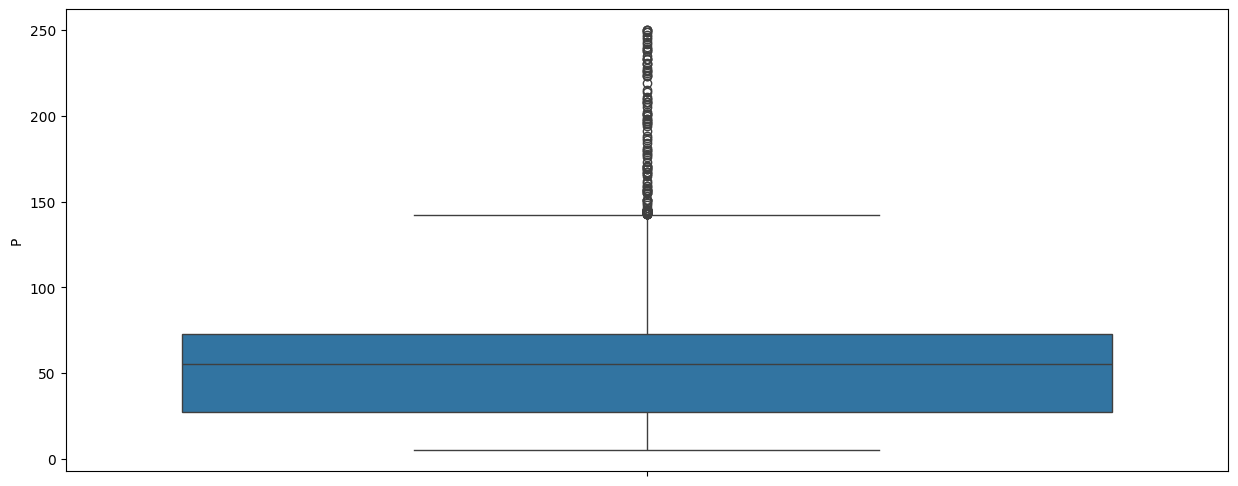

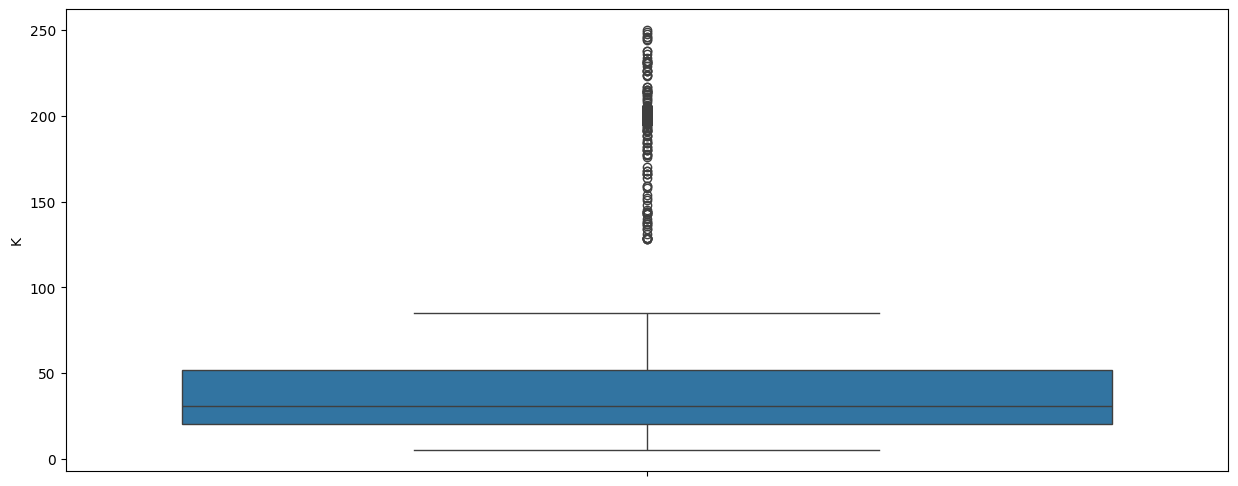

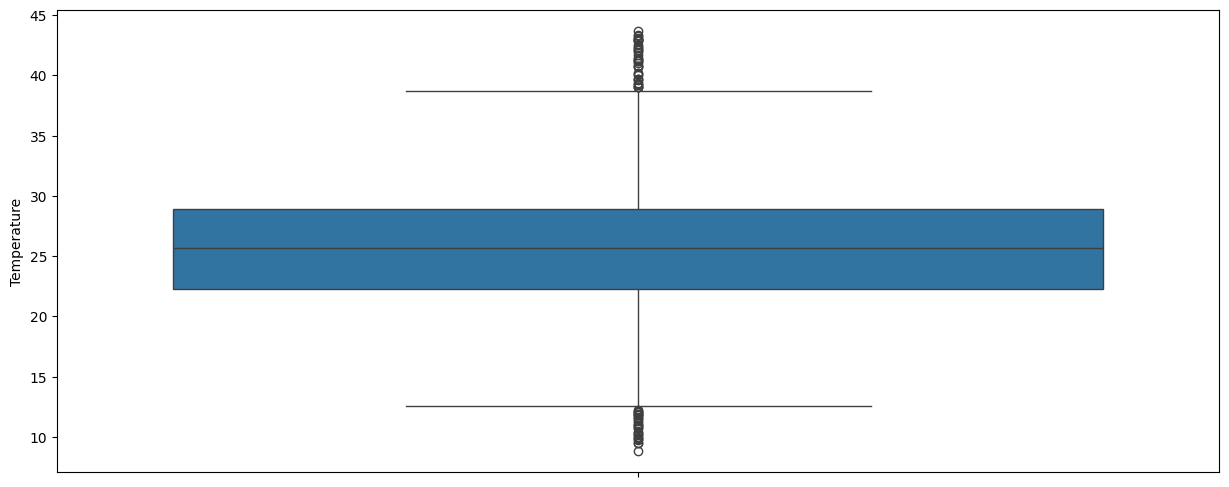

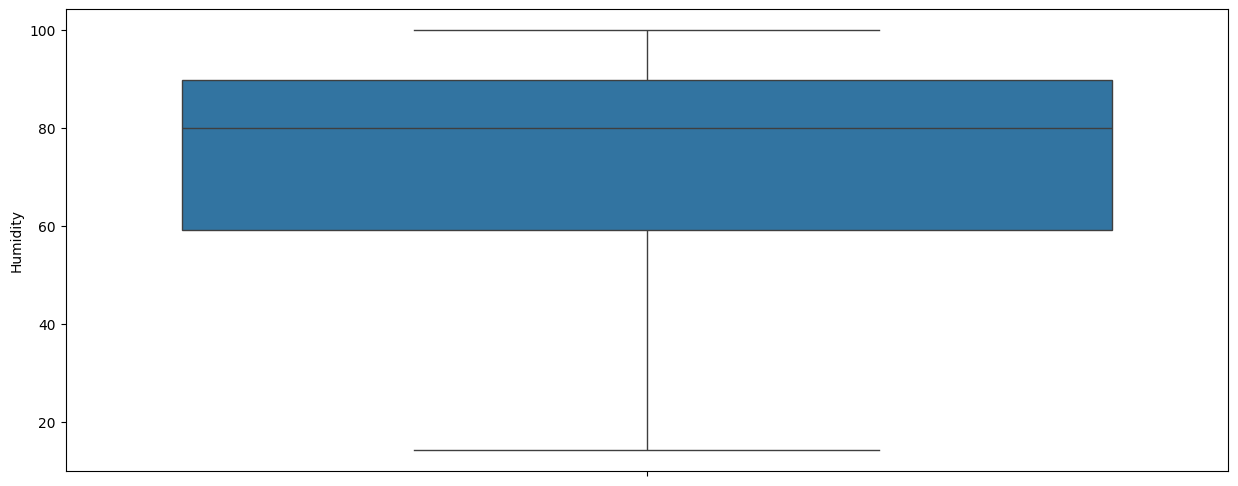

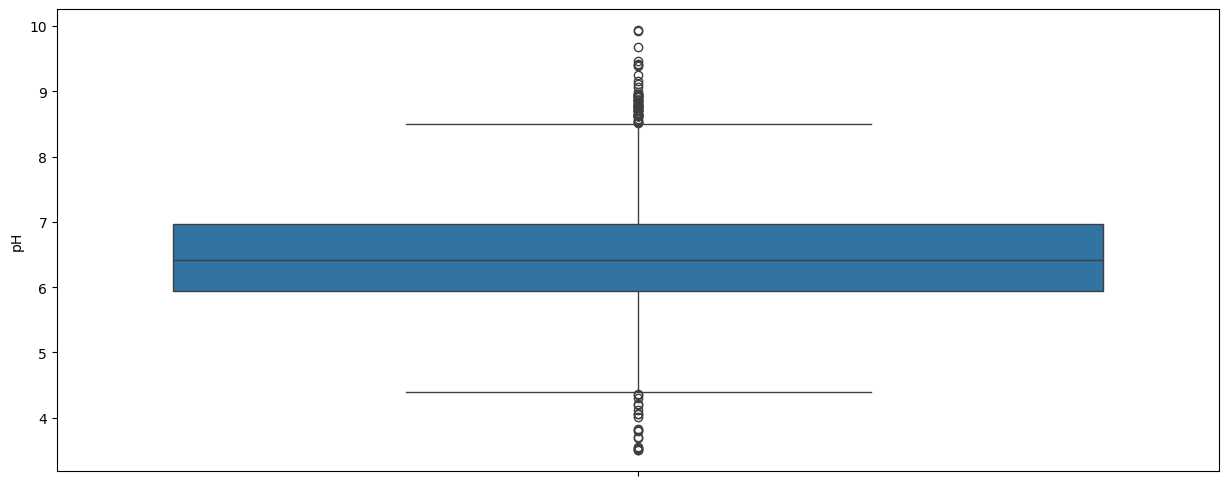

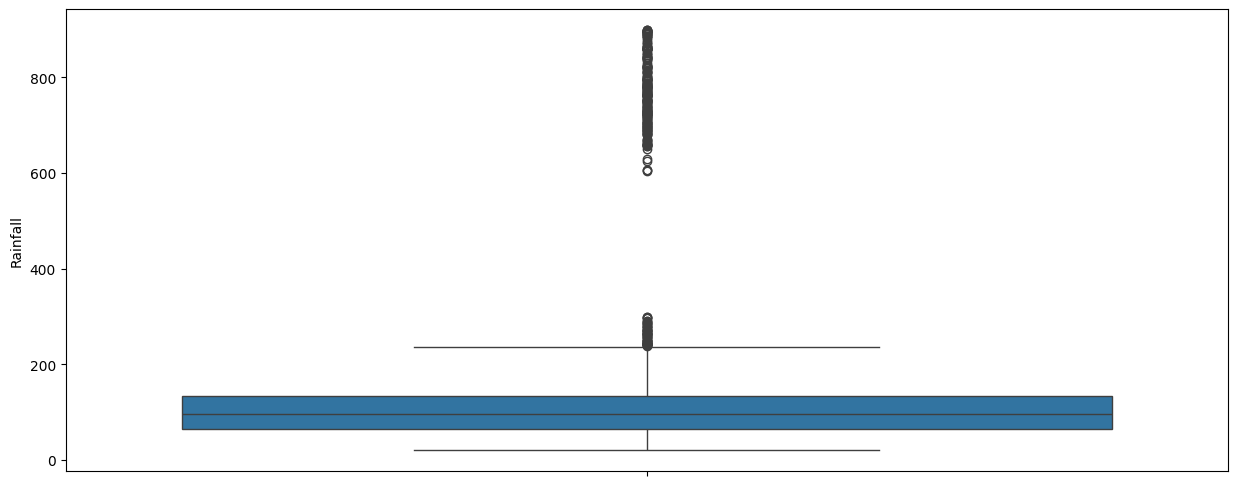

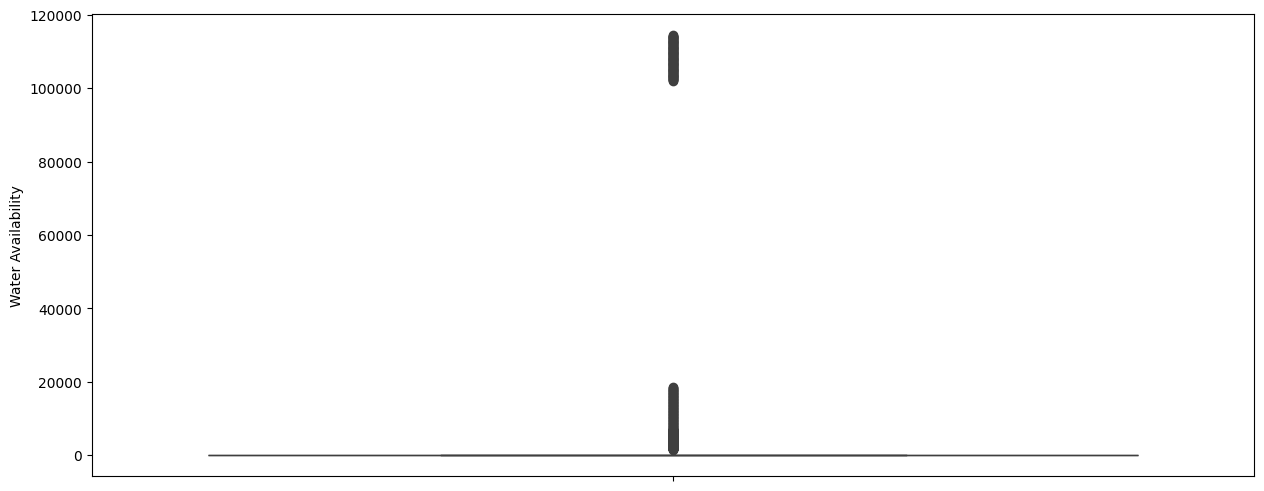

In [14]:
features = df[['N','P','K','Temperature','Humidity','pH','Rainfall','Water Availability']]
for i in features.columns:
             plt.figure(figsize=(15,6))
             sns.boxplot(features[i])
             plt.xticks(rotation = 90)
             plt.show()

In [15]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - outlier")
            elif lower_limit < x.min():
                print("Lower limit passed - No outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - outlier")
for i in df['Label'].unique():
    detect_outlier(df['K'][df['Label']==i])
    print(' ')


Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No outlier
Upper limit passed - No outlier
 
Lower limit: 8.875 

In [16]:
df[['N','P','K','Temperature','Humidity','pH','Rainfall', 'Water Availability']].corr()

,N,P,K,Temperature,Humidity,pH,Rainfall,Water Availability
N,1.000000,0.518281,0.420073,-0.040708,0.137837,0.245458,0.557683,0.169740
P,0.518281,1.000000,0.796330,-0.128518,-0.044529,0.091545,0.314149,-0.085884
K,0.420073,0.796330,1.000000,-0.162139,0.192895,0.013822,0.267683,-0.128014
Temperature,-0.040708,-0.128518,-0.162139,1.000000,0.183481,-0.009761,-0.008499,-0.056894
Humidity,0.137837,-0.044529,0.192895,0.183481,1.000000,0.010551,-0.057163,0.119791
pH,0.245458,0.091545,0.013822,-0.009761,0.010551,1.000000,0.108770,0.103731
Rainfall,0.557683,0.314149,0.267683,-0.008499,-0.057163,0.108770,1.000000,-0.084159
Water Availability,0.169740,-0.085884,-0.128014,-0.056894,0.119791,0.103731,-0.084159,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])


In [18]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0,stratify=y)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [22]:
param_grid = {'n_estimators': [50, 75,100, 150, 200, 300],}
classifier=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [24]:
accuracy_score(y_pred, y_test)

1.0

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on test data
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
   

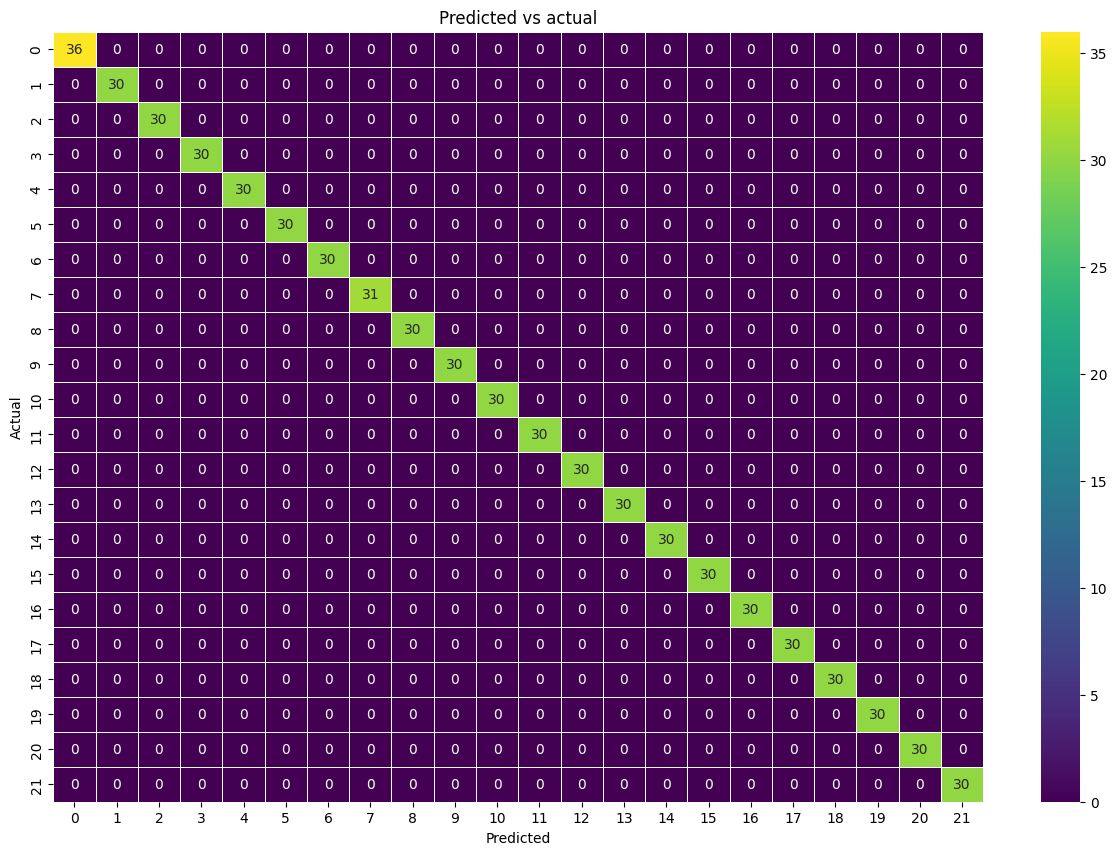

In [26]:
y_pred = classifier.predict(X_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [1]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.3 MB 980.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 1.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 2.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 2.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.2/1.3 MB 2.2 MB/s eta 0:00:01
   -------------------

In [14]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred1=lgbm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Compute accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

In [ ]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print(best_hyperparams)

In [ ]:
xg= xgb.XGBClassifier({'colsample_bytree': 0.7915505572786226, 'gamma': 2.6825905813531428, 'max_depth': 10.0, 'min_child_weight': 10.0, 'reg_alpha': 41.0, 'reg_lambda': 0.9089014862831776})
xg.fit(X_train, y_train)

In [ ]:
y_pred2=xg.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
sv=RandomizedSearchCV(SVC(),param_grid,cv=5)
sv.fit(X_train,y_train)
y_pred3=sv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

In [ ]:
y_pred3 = sv.predict(X_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred3)

f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred4=nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred4, average='weighted')
recall = recall_score(y_test, y_pred4, average='weighted')
f1 = f1_score(y_test, y_pred4, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred4))